In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import tqdm
import multiprocessing as mp
from config import *

path = result_parent_directory + os.sep + 'step4_btms_sizing_sensitivity'

result_directory = path + os.sep + 'analysis'
os.makedirs(result_directory, exist_ok=True)
figure_directory = path + os.sep + 'figures'
os.makedirs(figure_directory, exist_ok=True)

sizing_results_path = os.path.join(path, 'sizing_results')

load results 

In [2]:
# load all results from path to list and add taz name as df name
sizing_results = []
sizing_results_params = []
for folder in os.listdir(sizing_results_path):
    sizing_results_one_param_combination = []
    for file in os.listdir(sizing_results_path + os.sep + folder):
        if file.startswith('btms_sizing'):
            if file.endswith(".csv"):
                df0 = pd.read_csv(os.path.join(sizing_results_path, folder, file), index_col=0)
                name = file.split('.')[0]
                #remove btms_sizing from name
                df0.name = name.split('_')[2]
                sizing_results_one_param_combination.append(df0)
    sizing_results.append(sizing_results_one_param_combination)

In [3]:
for combination in sizing_results:
    print(combination[0].columns[-1])
#recognize parameters for each result in sizing_results
sizing_results_params = []
for x in sizing_results:
    df0 = x[0]
    a = df0['param: btms size, a,b_sys,b_cap,b_loan,c'][1]
    b_sys = df0['param: btms size, a,b_sys,b_cap,b_loan,c'][2]
    b_cap = df0['param: btms size, a,b_sys,b_cap,b_loan,c'][3]
    b_loan = df0['param: btms size, a,b_sys,b_cap,b_loan,c'][4]
    c = df0['param: btms size, a,b_sys,b_cap,b_loan,c'][5]
    param_dict= {'a': [a], 'b_sys': [b_sys], 'b_cap': [b_cap], 'b_loan':[b_loan], 'c': [c]}
    sizing_results_params.append(pd.DataFrame(param_dict))

param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c


In [4]:
#
df_params = pd.concat(sizing_results_params, axis=0)
df_params.index = df_params['a'] * 365/12
#df_params.sort_index(inplace=True)
df_params.index.argmax()

14

In [5]:
# create a list of all a values
a_values = []
for x in sizing_results_params:
    a_values.append(x['a'].values[0])
# create an idx list for sorting
a_values_idx = np.argsort(a_values)
# sort sizing_results and sizing_results_params
sizing_results = [sizing_results[i] for i in a_values_idx]
sizing_results_params = [sizing_results_params[i] for i in a_values_idx]

In [6]:
# show all a values multiplied by 365/12
a_values = [x['a'].values[0] for x in sizing_results_params]
a_values = [x*365/12 for x in a_values]
# round to 2 decimal places
a_values = [round(x, 2) for x in a_values]
print(a_values)

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]


In [7]:
from functions.stats_sizing_function import stats_sizing_function
# create df with stats for each parameter combination and each taz
stats_per_param_combination_list = []
for sizing_results_one_param_combination in sizing_results:
    stats = pd.DataFrame()
    for df0 in sizing_results_one_param_combination:
        stats = stats.append(pd.DataFrame(stats_sizing_function(df0, timestep), index=[df0.name]))
    stats_per_param_combination_list.append(stats)

In [8]:
stats_per_param_combination = pd.concat(stats_per_param_combination_list, keys=a_values)

In [9]:
# show stats for a = 1
stats_per_param_combination.loc[10].describe()

,btms_size,cost_a,cost_b_sys,cost_b_cap,cost_b_loan,cost_b,cost_c,cost_total,share_cost_a,share_cost_b_sys,...,share_cost_b_loan,share_cost_b,share_cost_c,E_Charge,c_rate,cycles_day,btms_ratio,load_factor,btms_peak_to_grid_ratio,grid_peak_to_charge_peak_ratio
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,...,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,259.474471,12.340986,19.753087,14.734058,5.946284,34.487145,11.472560,58.300691,0.187135,0.368462,...,0.100856,0.618369,0.194495,683.684094,2.000505,2.152736,0.859752,0.959947,18.925770,0.074887
std,108.566701,12.035887,7.609547,6.545669,2.641662,12.117878,5.111164,25.894608,0.075359,0.125424,...,0.018890,0.091532,0.036427,441.610667,0.956127,0.899103,0.112365,0.113871,15.327933,0.053340
min,43.676827,0.708324,6.189802,1.188625,0.479698,9.841876,0.920612,14.922015,0.045127,0.111181,...,0.030561,0.278555,0.058651,44.000000,0.538805,1.000000,0.215226,0.426560,2.000000,0.007182
25%,183.728819,6.094912,12.349002,9.562589,3.859213,24.131608,7.445391,40.264987,0.148746,0.276967,...,0.092041,0.565844,0.176961,382.416667,1.322806,1.556350,0.834508,1.000000,10.005281,0.043052
50%,252.708309,10.354984,20.048092,15.527903,6.266659,35.004584,12.019689,57.510347,0.173455,0.358881,...,0.103834,0.620570,0.199211,651.916667,1.838841,2.011824,0.878088,1.000000,15.674089,0.059973
75%,322.589287,13.975269,24.575555,19.649312,7.929953,42.802284,15.214280,72.907607,0.204683,0.443602,...,0.113251,0.667742,0.218727,878.083333,2.478977,2.435890,0.929953,1.000000,22.227510,0.090865
max,564.908501,98.630132,48.116417,30.838306,12.445541,78.954723,24.505425,181.450540,0.634974,0.820496,...,0.133641,0.896222,0.263156,2957.166667,6.819303,6.367642,0.992655,1.000000,138.244317,0.333333


In [10]:
stats_per_param_combination.loc[1].describe()

,btms_size,cost_a,cost_b_sys,cost_b_cap,cost_b_loan,cost_b,cost_c,cost_total,share_cost_a,share_cost_b_sys,...,share_cost_b_loan,share_cost_b,share_cost_c,E_Charge,c_rate,cycles_day,btms_ratio,load_factor,btms_peak_to_grid_ratio,grid_peak_to_charge_peak_ratio
count,1.570000e+02,157.000000,1.570000e+02,1.570000e+02,1.570000e+02,1.570000e+02,1.570000e+02,157.000000,1.570000e+02,1.570000e+02,...,1.570000e+02,1.570000e+02,1.570000e+02,157.000000,157.000000,157.000000,1.570000e+02,157.000000,1.570000e+02,1.570000e+02
mean,3.255358e-06,16.253032,2.061300e-07,3.079994e-08,1.243006e-08,2.369299e-07,2.397046e-08,16.253032,1.000000e+00,1.073739e-08,...,8.268945e-10,1.278632e-08,1.594332e-09,683.684094,1.427427,0.378640,2.307278e-09,0.058654,8.164001e-09,1.000000e+00
std,3.689673e-06,6.327021,3.993951e-07,3.714586e-08,1.499111e-08,4.269406e-07,2.889736e-08,6.327021,2.168570e-08,1.926472e-08,...,9.445730e-10,2.055755e-08,1.820239e-09,441.610667,1.329202,0.161244,3.319041e-09,0.031446,1.464761e-08,1.465681e-08
min,6.946973e-08,4.931507,5.702330e-10,9.822279e-10,3.964017e-10,1.552461e-09,7.622996e-10,4.931507,9.999999e-01,5.781529e-11,...,2.327012e-11,1.574023e-10,4.521063e-11,44.000000,0.015596,0.052928,3.673018e-11,0.006115,4.395890e-11,9.999999e-01
25%,3.881776e-07,9.863014,1.271371e-08,3.521255e-09,1.421087e-09,2.159577e-08,2.736319e-09,9.863014,1.000000e+00,1.051014e-09,...,8.872667e-11,1.335654e-09,1.707087e-10,382.416667,0.280920,0.282093,2.324475e-10,0.037202,7.991215e-10,1.000000e+00
50%,1.821063e-06,16.438356,3.087948e-08,1.170688e-08,4.724592e-09,4.650252e-08,9.114910e-09,16.438356,1.000000e+00,2.128169e-09,...,3.624219e-10,3.509200e-09,7.000955e-10,651.916667,1.131589,0.369063,7.647249e-10,0.051494,1.618118e-09,1.000000e+00
75%,5.221610e-06,19.726027,1.565855e-07,4.901700e-08,1.978199e-08,1.882567e-07,3.802175e-08,19.726027,1.000000e+00,8.928358e-09,...,1.430515e-09,1.402017e-08,2.748344e-09,878.083333,2.175454,0.468994,2.929059e-09,0.075224,6.788530e-09,1.000000e+00
max,1.781847e-05,44.383561,2.729143e-06,1.505312e-07,6.075051e-08,2.849777e-06,1.170085e-07,44.383562,1.000000e+00,1.087150e-07,...,4.081115e-09,1.115538e-07,7.840646e-09,2957.166667,7.134041,0.837651,1.673441e-08,0.186652,8.265970e-08,1.000000e+00


In [ ]:
stats_per_param_combination.loc[0].columns

In [ ]:
# get btms peak to grid ratio mean and std for each a value
btms_peak_to_grid_ratio_mean = []
btms_peak_to_grid_ratio_std = []
# for a in a_values:
#     btms_peak_to_grid_ratio_mean.append(stats_per_param_combination.loc[a]['btms_peak_to_grid_ratio'].mean())
#     btms_peak_to_grid_ratio_std.append(stats_per_param_combination.loc[a]['btms_peak_to_grid_ratio'].std())

# plot btms peak to grid ratio mean and std for each a value
# fig, ax = plt.subplots(figsize=(10, 5))
# ax.errorbar(a_values, btms_peak_to_grid_ratio_mean, yerr=btms_peak_to_grid_ratio_std, fmt='o')
# ax.set_xlabel('a')
# ax.set_ylabel('btms peak to grid ratio')
# ax.set_title('btms peak to grid ratio mean and std for each a value')

# plot violin plot for btms peak to grid ratio for each a value
plt.rcParams['font.size'] = 10
fig, ax = plt.subplots(figsize=(10, 5))
x = stats_per_param_combination['btms_peak_to_grid_ratio']
dists = [stats_per_param_combination.loc[i]['btms_peak_to_grid_ratio'] for i in a_values]
ax.violinplot(dists, a_values, showmeans=False, showextrema=False, showmedians=True)
ax.set_xlabel('a')
ax.set_ylim(0, 40)
ax.set_ylabel('btms peak to grid ratio')
ax.set_title('btms peak to grid ratio for each a value')


In [ ]:
# make a plot of the stats over the a values for mu and sigma of the btms ratio
zoom =1
pltSettings()
fig, ax_arr = plt.subplots(3, 2, figsize=(zoom*plotSizeX, zoom*4.2*plotSizeY), sharex=True, sharey=False)
ax = ax_arr.flatten()

def plot_mean_median_color_area(ax, column, alpha):
    ax.plot(a_values, stats_per_param_combination.loc[:, column].groupby(level=0).mean(), label='mean', color='orange')
    ax.plot(a_values, stats_per_param_combination.loc[:, column].groupby(level=0).median(), label='median', color='darkblue', linestyle='--')
    for i in np.arange(0, 1, 0.05):
        ax.fill_between(a_values, stats_per_param_combination.loc[:, column].groupby(level=0).quantile(i), stats_per_param_combination.loc[:, column].groupby(level=0).quantile(1-i), alpha=alpha,  color='C0', linewidth=0, rasterized=True)
    # add lines for 12.5% and 87.5% quantile
    ax.plot(a_values, stats_per_param_combination.loc[:, column].groupby(level=0).quantile(0.125), color='C0', linestyle=':')
    ax.plot(a_values, stats_per_param_combination.loc[:, column].groupby(level=0).quantile(0.875), color='C0', linestyle=':')
    # add text for 12.5% and 87.5% quantile
    # mark area with 75%
    if column == 'load_factor':
        x = 8
    elif column == 'btms_ratio':
        x = 7
    elif column == 'cost_a':
        x = 17
    elif column == 'grid_peak_to_charge_peak_ratio':
        x = 5
    else:
        x = 10
    y = stats_per_param_combination.loc[:, column].groupby(level=0).quantile(0.125).values[x+1]
    ax.text(x,y, '75%', horizontalalignment='center', verticalalignment='bottom') #, transform=ax.transAxes)
    # add x and y label
    #ax.set_ylabel(column)
    # add legend
    #ax.legend()
    ax.set_xlim(0, 20)

alpha = 0.08
plot_mean_median_color_area(ax[2], 'btms_ratio', alpha)
plot_mean_median_color_area(ax[5], 'c_rate', alpha)
plot_mean_median_color_area(ax[0], 'load_factor', alpha)
plot_mean_median_color_area(ax[3], 'cycles_day', alpha)
plot_mean_median_color_area(ax[4], 'btms_size', alpha)
plot_mean_median_color_area(ax[1], 'grid_peak_to_charge_peak_ratio', alpha)
           
# ax0
ax[2].set_ylim(0, 1.1)
ax[2].set_title('BTMS-Ratio [-]', fontsize = 7)
# ax1
ax[5].set_ylim(0, 6)
ax[5].set_title('C-Rate [-]', fontsize = 7)
# plot legend with rectangular shape
#ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=7)

# ax2
ax[0].set_ylim(0, 1.1)
ax[0].set_title(r'$f_\mathrm{load}$ [-]', fontsize = 7)
ax[1].legend(loc = 'upper right', fontsize = 7)
# ax3
ax[3].set_ylim(0, 4)
ax[3].set_title('Cycles [-]', fontsize = 7)

# ax4
ax[4].set_ylim(0, 600)
ax[4].set_title('BTMS-Size [kWh]', fontsize = 7)
ax[4].set_xlabel(r'$a [\frac{\$}{\mathrm{kW}}]$')
# ax5
ax[1].set_ylim(0, 1.1)
ax[1].set_title('Peak-Ratio[-]', fontsize = 7)
ax[5].set_xlabel(r'$a [\frac{\$}{\mathrm{kW}}]$ [-]')

fig.tight_layout()

# save plot
fig.savefig(os.path.join(figure_directory, 'step4_stats_per_a_value.pdf'), dpi=300, bbox_inches='tight')

In [ ]:
%matplotlib inline
plot_cols = ['cost_a','cost_b', 'cost_c', 'cost_total']
col_titles = [r'Cost $a [\$]$', r'Cost $b [\$]$', r'Cost $c [\$]$', r'Total Cost $[\$]$']
# make a plot of the stats over the a values for mu and sigma of the btms ratio
zoom =1
pltSettings()
fig, ax_arr = plt.subplots(2,2, figsize=(zoom*plotSizeX, zoom*2*1.5*plotSizeY), sharex=True, sharey=False)
ax = ax_arr.flatten()

for i, col in enumerate(plot_cols):
    plot_mean_median_color_area(ax[i], col, alpha)
    ax[i].set_title(col_titles[i], fontsize = 7)

ax[0].set_ylim(0,100)
ax[1].legend(loc = 'upper right', fontsize = 7)
ax[1].set_ylim(0,100)
ax[2].set_xlabel(r'$a [\frac{\$}{\mathrm{kW}}]$')
ax[2].set_ylim(0,100)
ax[3].set_xlabel(r'$a [\frac{\$}{\mathrm{kW}}]$')
ax[3].set_ylim(0,100)

fig.tight_layout()
plt.show()

# export to pdf
fig.savefig(os.path.join(figure_directory, 'step4_costs_per_a.pdf'), dpi=300, bbox_inches='tight')

In [ ]:
a_values

In [ ]:
# print trajectories for a = 3
a = 5
sizing_results_a_choosen = sizing_results[a+1]

# plot results
from tqdm import tqdm
for df in tqdm(sizing_results_a_choosen):
    pltSettings()
    # use seaborn style
    plt.style.use('seaborn')
    # box around legend
    plt.rcParams['legend.frameon'] = True
    fig, ax = plt.subplots(2,1, figsize=(10,10), sharex=True, gridspec_kw={'height_ratios': [2, 1]} )
    time_in_h = df['time']/3600
    stats_i = stats_sizing_function(df, timestep)

    btms_size = df['param: btms size, a,b_sys,b_cap,b_loan,c'].iloc[0]

    ax[0].step(time_in_h, df['P_BTMS'], label=r'$P_\Theta$')
    ax[0].step(time_in_h, df['P_Charge'], label=r'$P_{Charge}$')
    ax[0].step(time_in_h, df['P_Grid'], label=r'$P_{Grid}$')
    ax[0].set_title('Power usage at ' + df.name)
    ax[0].set_ylabel('Power [kW]')
    ax[0].set_ylim(-1000, 1000)
    # legend outside of plot
    ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    ax[1].plot(time_in_h, df['E_BTMS'] - df['E_BTMS'].min(), label=r'$E_\Theta$')
    ax[1].hlines(btms_size, 0, max(time_in_h), label='BTMS-Size', linestyles='dashed')
    ax[1].set_ylabel('Energy [kWh]')
    ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    ax[1].set_xlabel('Time [h]')
    ax[1].set_xlim(0, max(time_in_h))

    # add text box with informations, costs and sizing results
    textstr1 = '\n'.join([
        r'$cost_{a}= \$ %.2f$' % stats_i['cost_a'],
        r'$cost_{b}= \$ %.2f$' % stats_i['cost_b'],
        r'$cost_{c}= \$ %.2f$' % stats_i['cost_c'],
        r'$cost_{total}= \$ %.2f$' % stats_i['cost_total'],])
    textstr2 = '\n'.join([
        r'$BTMS-Size =%.2f$ kWh' % stats_i['btms_size'],
        r'$\max{P_{\Theta}}=%.2f$ kW' % df['P_BTMS'].abs().max(),
        r'$\max{P_{Grid}}=%.2f$ kW' % df['P_Grid'].max(),
        r'C-Rate: %.2f' % stats_i['c_rate'],
        r'Cycles: %.2f' % stats_i['cycles_day'],
        r'BTMS-Ratio: %.2f' % stats_i['btms_ratio'],
        r'Load-Factor(Grid): %.2f' % stats_i['load_factor'],
        r'E_Charge: %.2f' % stats_i['E_Charge'],
        ])
    textstr = '\n'.join([
        textstr1, 
        textstr2])
    
    # add text under legend of first plot
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax[0].text(1.05, 0.10, textstr, transform = ax[0].transAxes, fontsize = 10, bbox=props, va='bottom', ha='left')
    os.makedirs(os.path.join(figure_directory, 'a ' + str(a)), exist_ok=True)
    plt.savefig(os.path.join(figure_directory, 'a ' + str(a), df.name + '_btms_sizing.png'), dpi=300, bbox_inches='tight')
    plt.close()

In [56]:
stats_per_param_combination.loc[5].columns

Index(['btms_size', 'cost_a', 'cost_b_sys', 'cost_b_cap', 'cost_b_loan',
       'cost_b', 'cost_c', 'cost_total', 'share_cost_a', 'share_cost_b_sys',
       'share_cost_b_cap', 'share_cost_b_loan', 'share_cost_b', 'share_cost_c',
       'E_Charge', 'c_rate', 'cycles_day', 'btms_ratio', 'load_factor',
       'btms_peak_to_grid_ratio', 'grid_peak_to_charge_peak_ratio'],
      dtype='object')

[<class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>]
[<class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>]


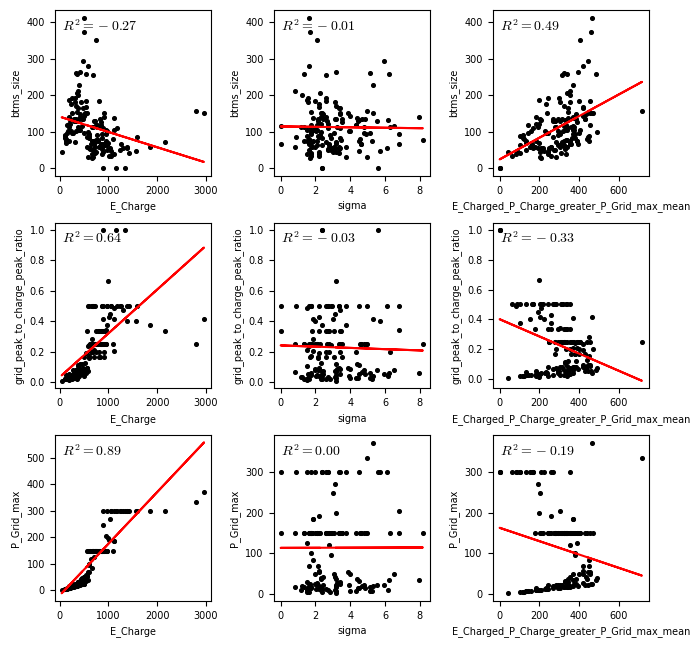

In [59]:
from scipy import stats as st
# examine the dependency of E_Charge, P_Charge_max, sigma(delta_t) on the storage_size, peak_ratio and P_Grid_max
# choose a value for a
a = 5
# plot results
plt.style.use('default')
pltSettings()

a_idx = np.where(np.array(a_values) == a)[0][0]

'''x values'''
# get P_Charge_max
P_Charge_max = {}
P_Charge_mean = {}
E_Charge_over_mean = {}
for df in sizing_results[a_idx]:
    P_Charge_max[df.name] = df['P_Charge'].abs().max()
    P_Charge_mean[df.name] = df['P_Charge'][df['P_Charge']>5].abs().mean()
    E_Charge_over_mean[df.name] = df['P_Charge'][df['P_Charge']>P_Charge_mean[df.name]*2].abs().sum()*60/3600
P_Charge_max = pd.Series(P_Charge_max)
P_Charge_mean = pd.Series(P_Charge_mean)
P_Charge_max.sort_index(inplace=True)
P_Charge_mean.sort_index(inplace=True)
P_Charge_max.name = 'P_Charge_max'
P_Charge_mean.name = 'P_Charge_mean'

P_Charge_max_to_mean = (P_Charge_max-P_Charge_mean)
P_Charge_max_to_mean.name = 'P_Charge_max/P_Charge_mean'
E_Charge_over_mean = pd.Series(E_Charge_over_mean)
E_Charge_over_mean.name = 'E_Charge_over_mean'

P_Charge_max_to_E_Charge = (P_Charge_max/stats_per_param_combination.loc[a_idx]['E_Charge'])
P_Charge_max_to_E_Charge.name = 'P_Charge_max/E_Charge'

# get sigma(delta_t)
# load frequency analysis
frequency_analysis = pd.read_csv(os.path.join(result_parent_directory,'step0_data_preparation_and_analysis', 'frequency_analysis.csv'), index_col=0)
frequency_analysis.head()
frequency_analysis.set_index('taz', inplace=True)
# remove tazs with no data
idx = frequency_analysis['time_since_last_event'] != '[0]'
frequency_analysis = frequency_analysis[idx]
frequency_analysis.sort_index(inplace=True)
sigma_delta_t = frequency_analysis['sigma']
sigma_delta_t = sigma_delta_t/3600

'''y values'''
# get P_Grid_max
P_Grid_max = {}
for df in sizing_results[a_idx]:
    P_Grid_max[df.name] = df['P_Grid'].max()
P_Grid_max = pd.Series(P_Grid_max)
P_Grid_max.sort_index(inplace=True)
P_Grid_max.name = 'P_Grid_max'

btms_to_E_Charge = stats_per_param_combination.loc[a_idx]['btms_size']/stats_per_param_combination.loc[a_idx]['E_Charge']
btms_to_E_Charge.name = 'btms_size/E_Charge'

E_Charged_P_Charge_greater_P_Grid_max_mean = {}
for df in sizing_results[a_idx]:
    _res = df[df['P_Charge']>df['P_Grid'].max()]['P_Charge'] - df['P_Grid'].max()
    _res = _res.sum() * 60/3600
    E_Charged_P_Charge_greater_P_Grid_max_mean[df.name] = _res
E_Charged_P_Charge_greater_P_Grid_max_mean = pd.Series(E_Charged_P_Charge_greater_P_Grid_max_mean)
E_Charged_P_Charge_greater_P_Grid_max_mean.sort_index(inplace=True)
E_Charged_P_Charge_greater_P_Grid_max_mean.name = 'E_Charged_P_Charge_greater_P_Grid_max_mean'


x = [stats_per_param_combination.loc[a_idx]['E_Charge'], sigma_delta_t, E_Charged_P_Charge_greater_P_Grid_max_mean]
print([type(z) for z in x])
y = [stats_per_param_combination.loc[a_idx]['btms_size'],stats_per_param_combination.loc[a_idx]['grid_peak_to_charge_peak_ratio'] ,P_Grid_max,]
print([type(z) for z in y])

# plot
fig, ax = plt.subplots(len(y), len(x), figsize=(plotSizeX2col, 3* 0.8* plotSizeY2col))


for x_i in range(len(x)):
    for y_i in range(len(y)):
        ax[y_i, x_i].scatter(x[x_i], y[y_i], marker='o', color='k', s = 7)
        ax[y_i, x_i].set_xlabel(x[x_i].name)
        ax[y_i, x_i].set_ylabel(y[y_i].name)
        # add trendline
        slope, intercept, r_value, p_value, std_err = st.linregress(x[x_i], y[y_i])
        ax[y_i, x_i].plot(x[x_i], intercept + slope*x[x_i], 'r', label='fitted line')
        # add r_value
        ax[y_i, x_i].text(0.05, 0.95, r'$R^2=%.2f$' % r_value, transform = ax[y_i, x_i].transAxes, fontsize = 10, va='top', ha='left')

        # ax[y_i, x_i].legend()
        # ax[y_i, x_i].grid(True)
        # ax[y_i, x_i].set_title('r = %.2f' % r_value)
        # ax[y_i, x_i].set_xlim(x[x_i].min(), x[x_i].max())
        # ax[y_i, x_i].set_ylim(y[y_i].min(), y[y_i].max())

plt.tight_layout()